Imports

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with Image.open('images/birds.jpg') as img:
    img_arr = np.array(img)

1. **Flip the Image**:
   - Flip the image horizontally and vertically (left-to-right and up-to-down).

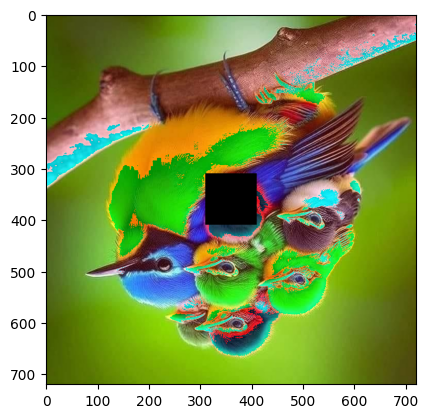

In [ ]:
def flip_image(img_arr, axis=1):
    """
    Flip the image along the specified axis.
    
    Parameters:
    - img_arr: The input image array (height, width, 3).
    - axis: The axis along which to flip the image.
      - 0 for vertical flip (top-to-bottom).
      - 1 for horizontal flip (left-to-right).
    
    Returns:
    - Flipped image array.
    """
    if axis == 0: 
        return img_arr[::-1, :, :]
    elif axis == 1:
        return img_arr[:, ::-1, :]
    else:
        raise ValueError("Invalid axis")
    
    
# horizontally
horizontal_flip = flip_image(img_arr, axis=1)
plt.imshow(horizontal_flip)

# vertically
vertical_flip = flip_image(img_arr, axis=0)
plt.imshow(vertical_flip)

2. **Add Random Noise**:
   - Add random noise to the image.

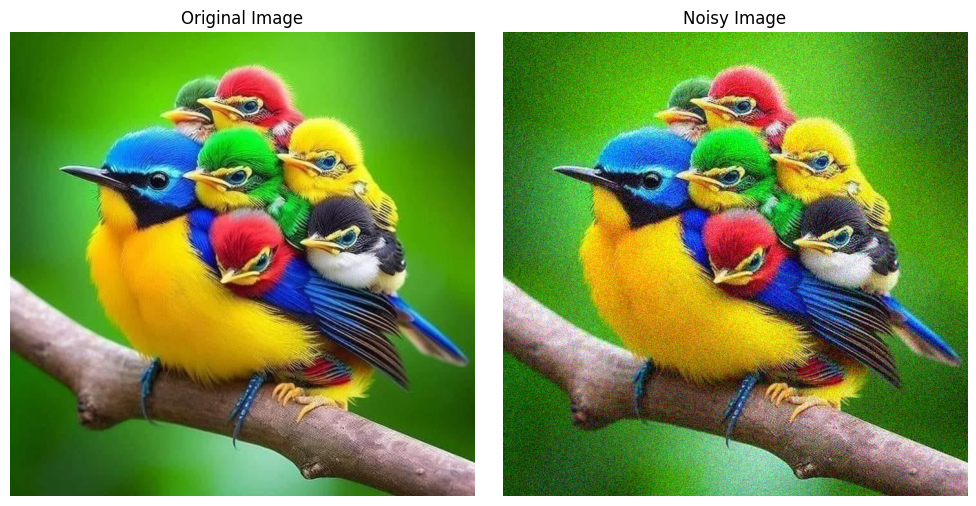

In [38]:
def add_noise(img):
    # Gaussian noise
    mean = 0 
    std_dev = 25
    noise = np.random.normal(mean, std_dev, np.array(img).shape)

    # add noise
    noisy_img = img + noise

    # clip values between 0 and 255
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    return noisy_img

noisy_img = add_noise(img)

# display original and noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_img)
plt.axis('off')

# save original and noisy images
plt.tight_layout()  # prevent overlap
plt.savefig('images/org_and_noisy.jpg', format='jpg', bbox_inches='tight', pad_inches=0)

plt.show()

save_img() function

In [27]:
def save_img(arr, name, mode):
    img = Image.fromarray(arr, mode)
    img.save(f'images/{name}.jpg')

3. **Brighten Channels**:
   - Increase the brightness of the channels (r.g. red channel) by a fixed value (e.g., 40). Clip the values to ensure they stay within the 0 to 255 range.

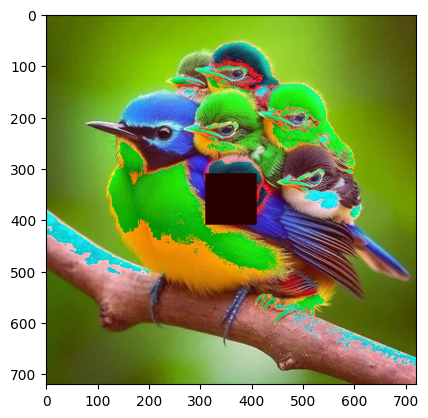

In [39]:
def brighten_channels(img_arr, channel, enhance_value):
    """
    Brightens a specified channel of the image by a fixed value.

    Parameters:
    - img_arr: The input image array (height, width, 3).
    - channel: The channel to enhance ('red', 'green', or 'blue').
    - enhance_value: The value to increase the selected channel by.
    
    Returns:
    - img_arr: The image with the brightened channel.
    """
    if channel not in ['red', 'green', 'blue']:
        raise ValueError("Channel must be 'red', 'green', or 'blue'")

    # Channel index based on the input channel
    if channel == 'red':
        channel_index = 0
    elif channel == 'green':
        channel_index = 1
    elif channel == 'blue':
        channel_index = 2

    # Enhance the selected channel by the specified value
    enhanced_channel = img_arr[:, :, channel_index] + enhance_value

    # Clip values to stay within the valid range [0, 255]
    img_arr[:, :, channel_index] = np.clip(enhanced_channel, 0, 255).astype(np.uint8)

    return img_arr


img_red_enhanced = brighten_channels(img_arr, 'red', 40)
    
# save
save_img(img_red_enhanced, 'red_channel_enhanced.jpg', 'RGB')
# show
plt.imshow(img_red_enhanced)

4. **Apply a Mask**:
   - Mask a rectangular region in the image (e.g., a 100x100 area in the center) by setting all pixel values in this region to black (0, 0, 0).

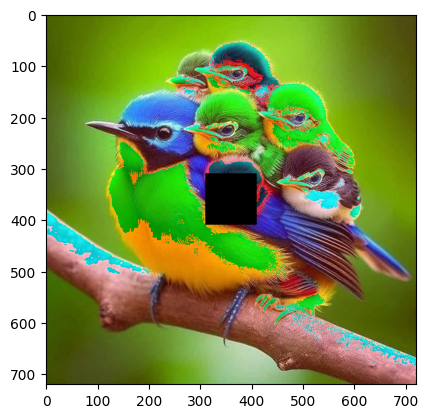

In [40]:
def apply_mask(img_arr):

    # dimensions
    height, width, _ = img_arr.shape

    # mask size
    mask_h = 100
    mask_w = 100

    # coordinates
    top_left_x = (height - mask_h) // 2
    top_left_y = (width - mask_w) // 2
    bottom_right_x = top_left_x + mask_h
    bottom_right_y = top_left_y + mask_w

    # apply mask
    img_arr[top_left_x:bottom_right_x, top_left_y:bottom_right_y, :] = 0

    return img_arr

img_arr = apply_mask(img_arr)

# display
plt.imshow(img_arr)

# save
save_img(img_arr, 'dark_center.jpg', 'RGB')